# Cats vs. Dogs CNN Classifier

### Creating classes and functions

In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import style
style.use("ggplot")
from skimage.io import imread, imshow
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import pandas as pd

In [2]:
### creating datasets ### 
class DogsVSCats():
    IMG_SIZE = 50
    CATS = "C:\\Users\\abhis\\Documents\\Sentdex\\kagglecatsanddogs_3367a\\PetImages\\Cat"
    DOGS = "C:\\Users\\abhis\\Documents\\Sentdex\\kagglecatsanddogs_3367a\\PetImages\\Dog"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

The purpose of this class is to create the dataset using pictures provided to us. This function will only need to be ran once as long as the user does not want to reconstruct the data. The class includes functions to grey-scale images as well as one hot encode the classifications.

In [3]:
### creating CNN ###
class Net(nn.Module):
    def __init__(self):
        super().__init__() 
        self.conv1 = nn.Conv2d(1, 32, 5) 
        self.conv2 = nn.Conv2d(32, 64, 5) 
        self.conv3 = nn.Conv2d(64, 128, 5)

        x = torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512) 
        self.fc2 = nn.Linear(512, 2) 

    def convs(self, x):
        # max pooling over 2x2
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  
        x = F.relu(self.fc1(x))
        x = self.fc2(x) 
        return F.softmax(x, dim=1)

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


In the Net function, we have created 3 convolutional layers and two linear layers. The activation functions are relu and the kernal window is 5x5 with the max pool window being 2x2.

In [4]:
### graphing function ###
def create_acc_loss_graph(model_name):
    contents = open("model.log", "r").read().split("\n")

    times = []
    accuracies = []
    losses = []

    val_accs = []
    val_losses = []

    for c in contents:
        if model_name in c:
            name, timestamp, acc, loss, val_acc, val_loss, _ = c.split(",")

            times.append(float(timestamp))
            accuracies.append(float(acc))
            losses.append(float(loss))

            val_accs.append(float(val_acc))
            val_losses.append(float(val_loss))


    fig = plt.figure()

    ax1 = plt.subplot2grid((2,1), (0,0))
    ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)


    ax1.plot(times, accuracies, label="acc")
    ax1.plot(times, val_accs, label="val_acc")
    ax1.legend(loc=2)
    ax2.plot(times,losses, label="loss")
    ax2.plot(times,val_losses, label="val_loss")
    ax2.legend(loc=2)
    plt.show()

The last function is a plotting function that takes the stored loss and accuracy values during the training session and plots the values.

In [5]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")  
else:
    device = torch.device("cpu")
    print("Running on the CPU")

net = Net().to(device)

Running on the CPU


This section of code will allow the user to use their GPU if they have one; if not it will default to CPU

In [6]:
REBUILD_DATA = False

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

### loading the data ###
training_data = np.load("training_data.npy", allow_pickle = True)

if rebuild data is set to True, then the CatsvsDogs class will execute and the training data will be created. However, the training data has been saved and will be loaded into the session?

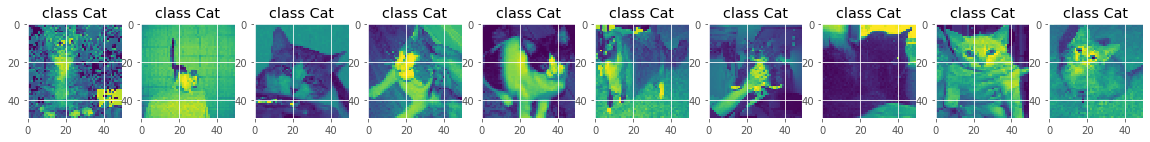

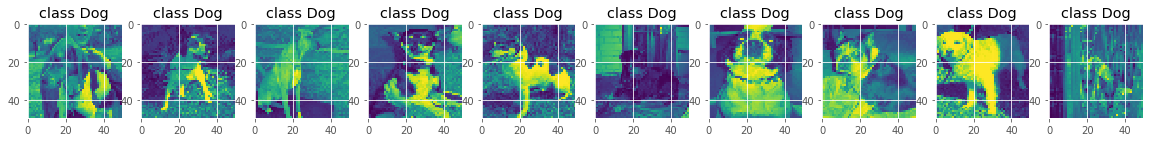

In [26]:
### visulalizing classes w/ greyscale ###
dog_img = []
cat_img = []

for i in range(training_data.shape[0]):
    if all(training_data[i][1] == np.array([1., 0.])):
        cat_img.append(training_data[i][0])
    elif all(training_data[i][1] == np.array([0., 1.])):
        dog_img.append(training_data[i][0])

dog_img = dog_img[0:10]
cat_img = cat_img[0:10]

fig1, axes1 = plt.subplots(1,10, figsize=(20,10))
fig2, axes2 = plt.subplots(1,10, figsize=(20,10))

for i in range(10):
    axes1[i].set_title('class {}'.format("Cat"))
    axes1[i].imshow(cat_img[i])
    axes2[i].set_title('class {}'.format("Dog"))
    axes2[i].imshow(dog_img[i])

plt.show()

These are the results of the image preprocessing step

### Doing the CNN

In [9]:
### creating optimizer and loss function ###
optimizer = optim.Adam(net.parameters(), lr = 0.001)
loss_function = nn.MSELoss()

# iterating through the images to convert them into tensors
X = torch.Tensor([i[0] for i in training_data]).view(-1, 50, 50)
# normalizing the pixels in the image by normalizing them by 225
X = X/225
# extrating the labels and converting to tensor
y = torch.Tensor([i[1] for i in training_data])

### creating train/validation split ###
VAL_PCT = 0.1
val_size = int(len(X)*VAL_PCT)

train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]


In [10]:
def fwd_pass(X, y, train=False):

    if train:
        net.zero_grad()
    outputs = net(X)
    matches  = [torch.argmax(i)==torch.argmax(j) for i, j in zip(outputs, y)]
    acc = matches.count(True)/len(matches)
    loss = loss_function(outputs, y)

    if train:
        loss.backward()
        optimizer.step()
    return acc, loss  

In [11]:
def test(size=32):
    X, y = test_X[:size], test_y[:size]
    val_acc, val_loss = fwd_pass(X.view(-1, 1, 50, 50).to(device), y.to(device))
    return val_acc, val_loss

val_acc, val_loss = test(size=100)
print(val_acc, val_loss)

0.45 tensor(0.2502, grad_fn=<MseLossBackward>)


In [12]:
MODEL_NAME = f"model-{int(time.time())}"  # gives a dynamic model name
net = Net().to(device)
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

In [13]:
def train(net):
    BATCH_SIZE = 100
    EPOCHS = 1

    with open("model.log", "a") as f:
        for epoch in range(EPOCHS):
            for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
                batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
                batch_y = train_y[i:i+BATCH_SIZE]

                batch_X, batch_y = batch_X.to(device), batch_y.to(device)

                acc, loss = fwd_pass(batch_X, batch_y, train=True)

                #print(f"Acc: {round(float(acc),2)}  Loss: {round(float(loss),4)}")
                #f.write(f"{MODEL_NAME},{round(time.time(),3)},train,{round(float(acc),2)},{round(float(loss),4)}\n")
                # just to show the above working, and then get out:
                if i % 50 == 0:
                    val_acc, val_loss = test(size=100)
                    f.write(f"{MODEL_NAME},{round(time.time(),3)},{round(float(acc),2)},{round(float(loss), 4)},{round(float(val_acc),2)},{round(float(val_loss),4)},{epoch}\n")

diagnostics = pd.read_csv("C:\\Users\\abhis\\Documents\\Sentdex\\model.log", header = None)



    


100%|██████████| 225/225 [04:13<00:00,  1.13s/it]


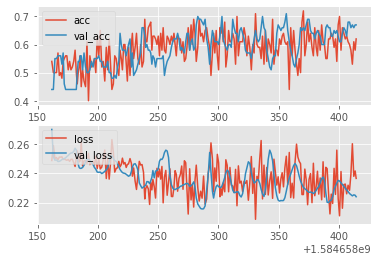

In [14]:
train(net)
model_name = MODEL_NAME
create_acc_loss_graph(model_name)

In [32]:
MODEL_NAME

'model-1584657464'

After running 3 epochs, we see that we can continue to add more epochs as there is no divergence yet between the train and validation set. Unforturnatly, since i am restricted to my cpu these caclulations take longer. However it would be interesting to try other cost functions and see how those would perform.